# Bank Marketing Term Deposit Forecasting

---

Dataset dapat di unduh melalui [tautan ini](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset/code)

# Import Necessary Library

---



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

# Data Loading

---



In [5]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# EDA (Exploratory Data Analysis)

---



> ## Deskripsi Variabel

Info data: diketahui memiliki 17 column dan 11162 baris dengan tipe data int, object.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


melihat diskripsi data seperti nilai *min max*, mean, standart deviasi dll.

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000




> ## Missing Value and Duplicate



In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
df.duplicated().sum()

0



> ## Univariate dan Multivariate Analysis

### Categorical Features

Mengambil data dengan tipe data object.


In [10]:
cat_data = df.select_dtypes(exclude='number').columns.drop(['deposit', 'job'])
cat_data

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

Membuat plot data kategori yang dibagi berdasarkan nilai deposit.

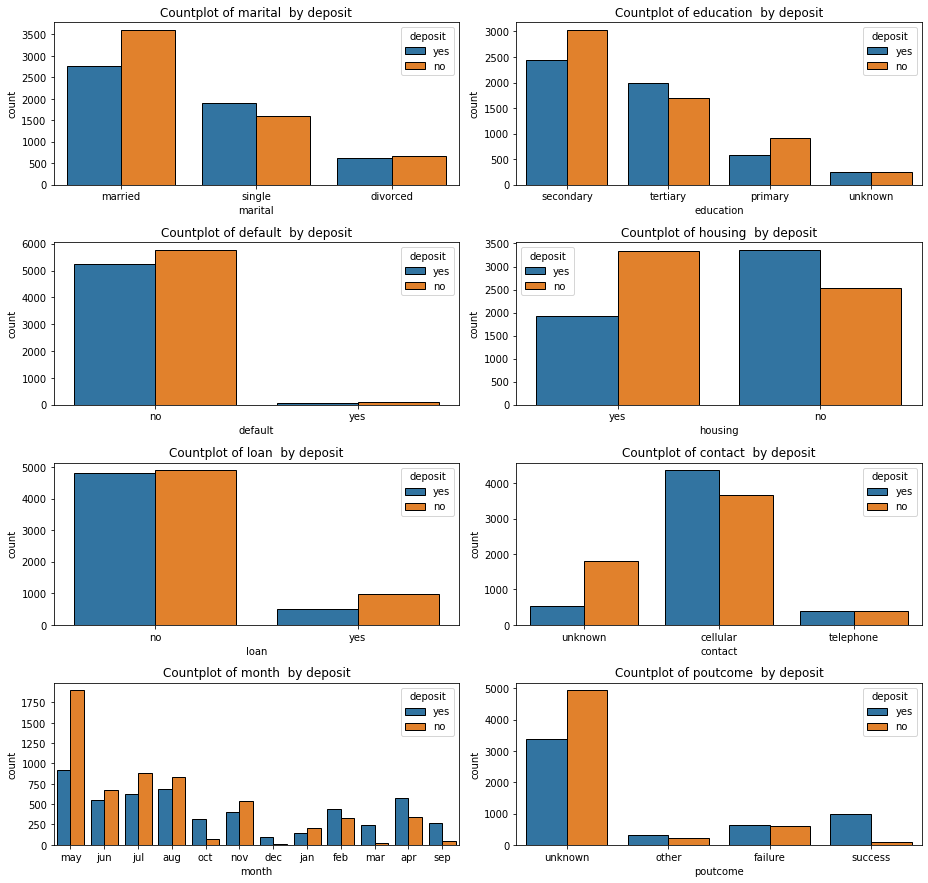

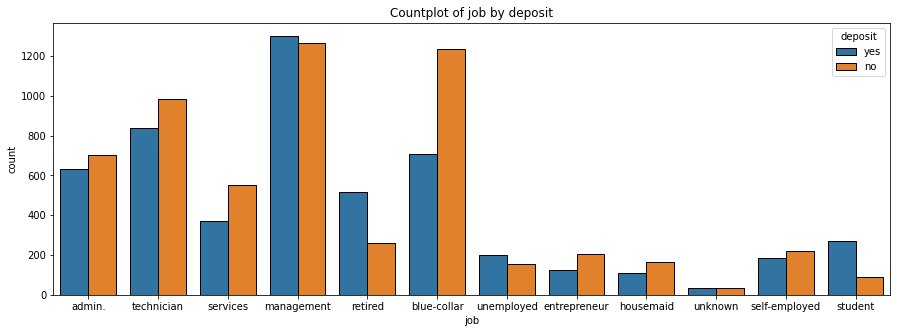

In [11]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(cat_data):
    plt.subplot(5,2,i+1)
    sns.countplot(x=cat_fea, hue='deposit', data=df,edgecolor="black")
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout()    
plt.show()
plt.figure(figsize=[15,5])
sns.countplot(x='job', hue='deposit',edgecolor="black",data=df)
plt.title("Countplot of job by deposit")
plt.show()

didapat hasil data yang imbalance pada *default* terlihat dari jarak jumlah dua kategori data

### Numerical Features

Mengambil data dengan tipe data numerik.

In [12]:
num_data = df.select_dtypes(include='number')
num_data.head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


Membuat plot data numerik menggunakan scatter plot untuk mengetahui apakah ada outlier pada data.

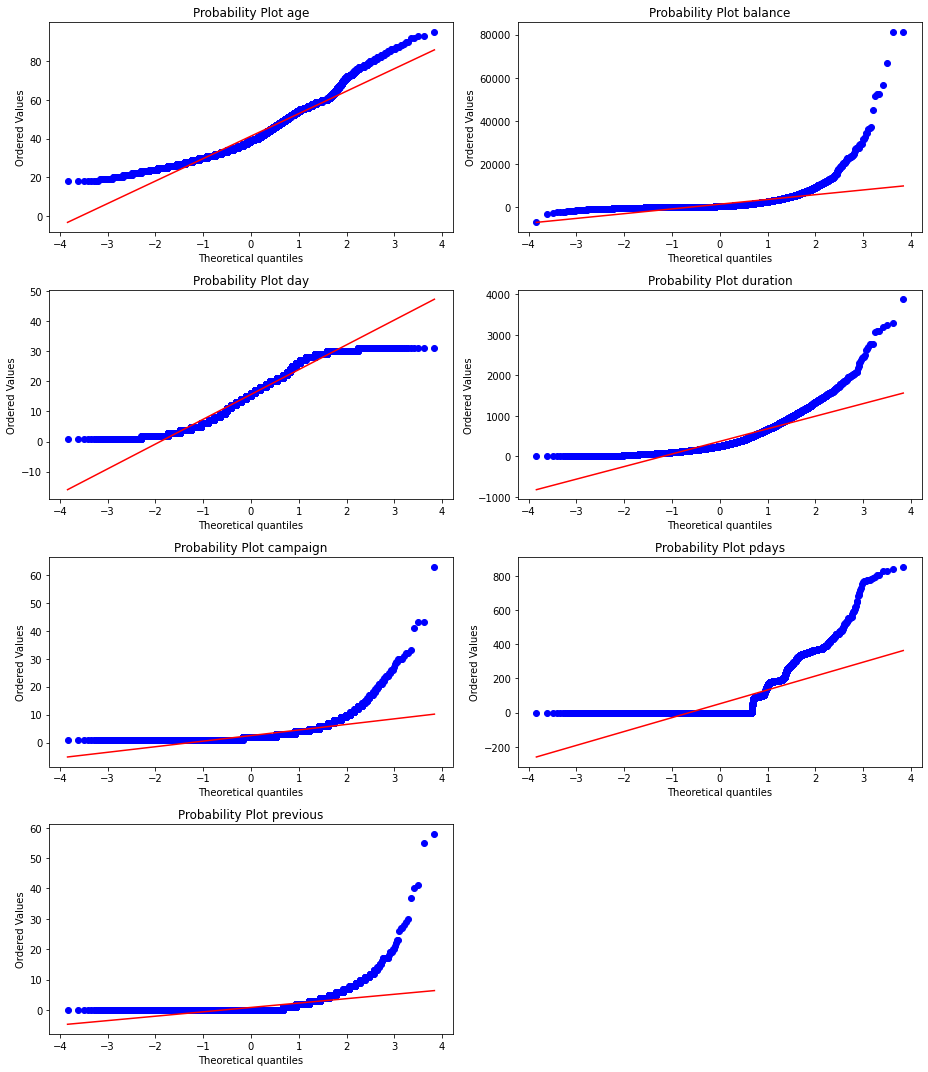

In [13]:
plt.figure(figsize=(13,15))
for i,num_fea in enumerate(num_data):
    plt.subplot(4,2,i+1)
    stats.probplot(df[num_fea], dist='norm', plot=plt)
    plt.title("Probability Plot {}".format(num_fea))
plt.tight_layout()    
plt.show()

Membuat plot data numerik yang dibagi berdasarkan nilai deposit.

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


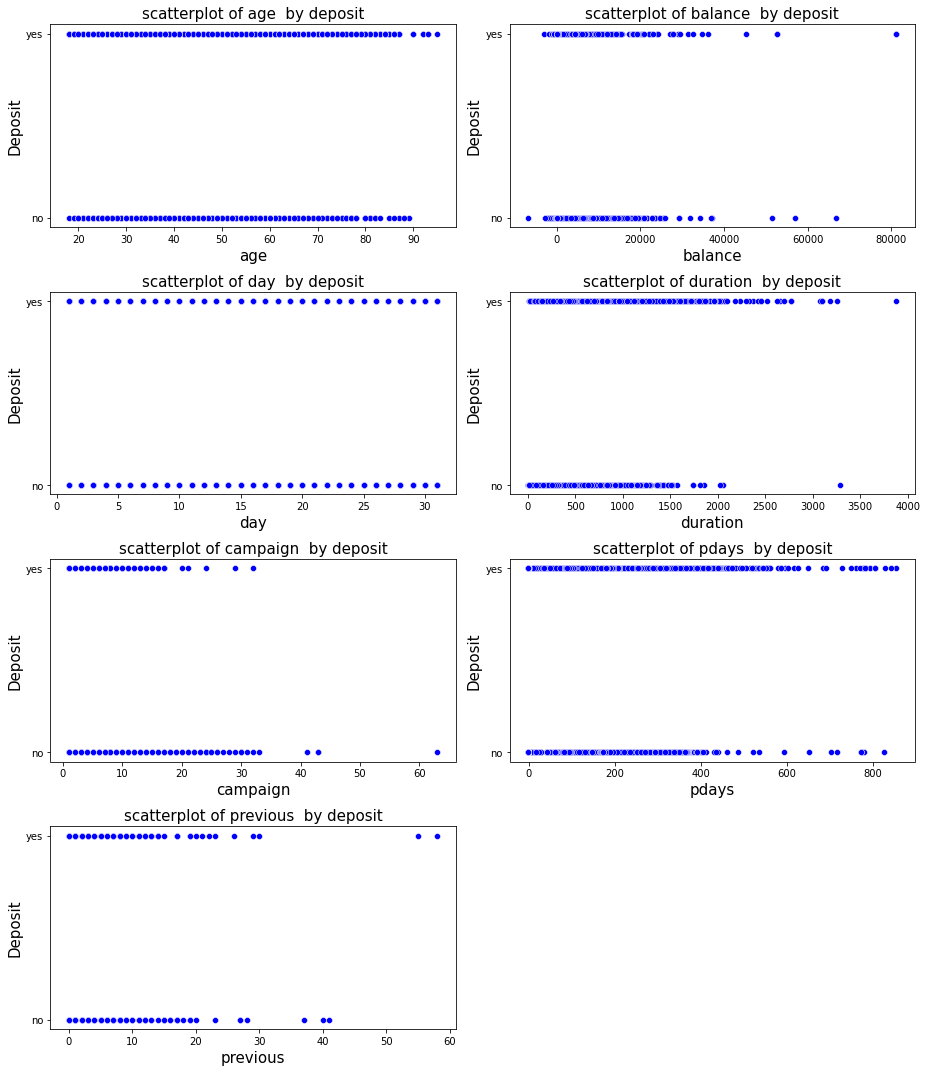

In [14]:
plt.figure(figsize=(13,15))
for i,v in enumerate(num_data):
    print(i,v)
    plt.subplot(4,2,i+1)
    sns.scatterplot(x=v,y=df['deposit'], data=num_data, color='blue')
    plt.title("scatterplot of {}  by deposit".format(v),size=15)
    plt.xlabel("{}".format(v),size=15)
    plt.ylabel("Deposit",size=15)
plt.tight_layout()
plt.show()

Membuat matriks korelasi data numerik.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

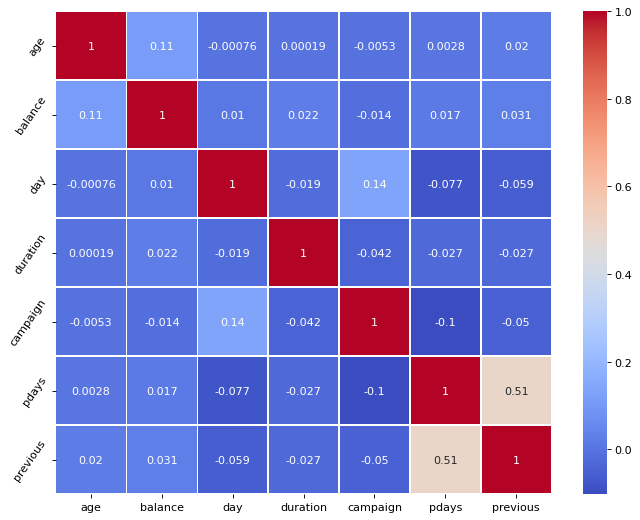

In [15]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(num_data.corr(),cmap="coolwarm",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

didapat hasil data yang balance dan pada korelasi data *pdays* dan *previous* yang positive maka bisa menggunakan salah satunya saja

### Outliers dan Down-Sampling

In [16]:
df.drop(columns =['default' ,'pdays'] ,axis =1 ,inplace = True)

## Target Data

mengecek apakah data target sudah balance.

In [17]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

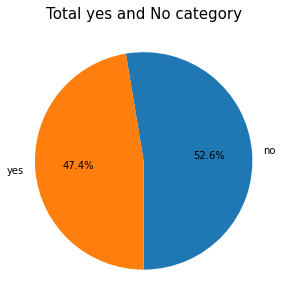

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
labels =df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', startangle=270,)
plt.title('Total yes and No category',size = 15)
plt.show()

data target sudah balance dengan dua kategori

# Data Preparation


---



> ## Encoding Data 

### Boolean type

melakukan one-hot encoding pada data boolean yaitu angka 1 untuk kategori 'yes' dan angka 0 untuk kategori 'no'

In [19]:
df.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'poutcome', 'deposit'],
      dtype='object')

In [20]:
boolean_cols = ['deposit', 'housing', 'loan']
for i in boolean_cols:
  df[i+'_new'] = df[i].apply(lambda x :1 if x =='yes' else 0)
  df.drop(i, axis=1, inplace=True)
df.head()

,age,job,marital,education,balance,contact,day,month,duration,campaign,previous,poutcome,deposit_new,housing_new,loan_new
0,59,admin.,married,secondary,2343,unknown,5,may,1042,1,0,unknown,1,1,0
1,56,admin.,married,secondary,45,unknown,5,may,1467,1,0,unknown,1,0,0
2,41,technician,married,secondary,1270,unknown,5,may,1389,1,0,unknown,1,1,0
3,55,services,married,secondary,2476,unknown,5,may,579,1,0,unknown,1,1,0
4,54,admin.,married,tertiary,184,unknown,5,may,673,2,0,unknown,1,0,0



### Category type


melakukan one-hot encoding untuk data kategori dimana akan bernilai 1 untuk setiap kategori yang bernilai benar

In [21]:
cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for i in cat_cols:
  df = pd.concat([df, pd.get_dummies(df[i], prefix=i)],axis=1)
  df.drop([i], axis=1, inplace=True)
df.head()

,age,balance,day,duration,campaign,previous,deposit_new,housing_new,loan_new,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1


melihat hasil akhir atau final data

In [22]:
df

,age,balance,day,duration,campaign,previous,deposit_new,housing_new,loan_new,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,5,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [23]:
df.deposit_new

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_new, Length: 11162, dtype: int64



> ## Split Dataset

split data dengan proporsi 8:2 dengan 8 untuk data train dan 2 untuk data test nya

In [24]:
X = df.drop(['deposit_new'], axis=1)
y = df['deposit_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [25]:
print(len(X_train))
print(len(X_test))

8929
2233


cek lagi diskripsi data apakah memiliki skala yang berjauhan setelah dilakukan cleaning data dan preprocessing

In [26]:
X_train.describe()

,age,balance,day,duration,campaign,previous,housing_new,loan_new,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,...,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.303841,1544.528727,15.645313,373.358159,2.514951,0.822377,0.469369,0.129242,0.118602,0.174824,...,0.109643,0.025871,0.252436,0.083548,0.034382,0.028335,0.109531,0.045918,0.097435,0.747116
std,11.936598,3229.614347,8.447297,349.906591,2.739967,2.242877,0.499089,0.335486,0.323338,0.379837,...,0.312461,0.158759,0.434434,0.276724,0.182219,0.165936,0.312321,0.209319,0.296566,0.434689
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,127.000000,8.000000,140.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,560.000000,15.000000,257.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1743.000000,22.000000,498.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


didapat hasil standar deviasi yang skalanya berjauhan dengan data yang dilakukan one-hot encoding

In [27]:
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'deposit_new', 'housing_new', 'loan_new', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

> ## Standarisasi

Untuk menyamakan standar deviasi antara data yang dilakukan one-hot endcoding (data kategori) dengan data numerik agar tidak terjadi bias. Proses ini dilakukan setelah split data untuk menghindari kebocoran target.

In [28]:
num_data = ['age', 'balance', 'day', 'duration', 'campaign', 'previous']
scaler = StandardScaler()
scaler.fit(X_train[num_data])
X_train[num_data] = scaler.transform(X_train.loc[:, num_data])
X_test[num_data] = scaler.transform(X_test.loc[:, num_data])
X_train[num_data].describe().round(2)

,age,balance,day,duration,campaign,previous
count,8929.00,8929.00,8929.00,8929.00,8929.00,8929.00
mean,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.95,-2.60,-1.73,-1.06,-0.55,-0.37
25%,-0.78,-0.44,-0.91,-0.67,-0.55,-0.37
50%,-0.19,-0.30,-0.08,-0.33,-0.19,-0.37
75%,0.64,0.06,0.75,0.36,0.18,0.08
max,4.50,24.67,1.82,10.03,22.08,25.49


# Modeling


---



> ## Model Training

Menggunakan logistic regression

In [29]:
model = linear_model.LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

> ## Model Evaluation


Mendefinisikan hyperparameter tuning untuk model

In [30]:
penalty = ['l1', 'l2']
C = np.logspace(2,5,20)

memasukkan hyperparameters kedalam dictionary untuk digunakan pada  model

In [31]:
hyperparameters = dict(penalty=penalty, C=C)

Mengatur hyperparameter tuning menggunakan Grid search

In [32]:
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=True, n_jobs=-1)

Fit model menggunakan best_model hasil dari Grid search

In [33]:
best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


print hasil hyperparameter best model

In [34]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 100.0


In [35]:
y_pred = best_model.predict(X_test)

Evaluasi model menggunakan confusion matrix

In [36]:
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1176
           1       0.84      0.78      0.81      1057

    accuracy                           0.83      2233
   macro avg       0.83      0.82      0.82      2233
weighted avg       0.83      0.83      0.83      2233



0.8234080055863405